# Kanade-Roussell conjecture

From our course, we saw the Kanade-Roussell conjecture which uses the groups :

$$K = \{\lambda \in Par \mid \forall i \in [\space 1, l(\lambda)-2 \space], \space \lambda_i - \lambda_{i+2} \ge 3 \wedge \forall i \in [\space 1, l(\lambda)-1 \space], \space \lambda_i - \lambda_{i+1} \le 1 \Rightarrow \lambda_i + \lambda_{i+1} \in 3\Z \}$$
$$K^{\prime} = \{\lambda \in K \mid m_1(\lambda) = 0 \}$$
$$K^{\prime \prime} = \{\lambda \in K \mid m_1(\lambda) = m_2(\lambda) = 0 \}$$
$$T^{(q)}_{a,b,c,d} = \{\lambda \in Par \mid \forall i \in [\space 1, l(\lambda) \space], \space \lambda_i \equiv a,b,c,d \space mod \space q\}$$

the Kanade-Roussell conjecture is as follow: $\begin{cases} 
                                            K \space \space \overset{PT}{\sim} \space T^{(9)}_{1,3,6,8} \\ 
                                            K^{\prime} \space \overset{PT}{\sim} \space T^{(9)}_{2,3,6,7} \\ 
                                            K^{\prime \prime} \overset{PT}{\sim} \space T^{(9)}_{4,3,6,5} 
                                            \end{cases}$

first, let us create each ensemble $Par(n)$:

In [1]:
def Par_slow(n):
    if n == 0:
        return []

    res = [[n]]
    for i in range(n-1,0,-1):
        suffixes = Par_slow(n-i)
        for suff in suffixes:
            if suff[0] <= i:
                res.append([i] + suff)

    return res

This way of calculating $Par(n)$ is extremely slow.
Let us note $p(n) = |Par(n)| \sim \frac{1}{4n\sqrt{3}}e^{\pi\sqrt{\frac{2n}{3}}}$ (demonstrated by Hardy and Ramanujan) and $F_n = \frac{1}{\sqrt{5}}(\varphi^n - (-\frac{1}{\varphi})^n)$ with $\varphi = \frac{1 + \sqrt{5}}{2}$. The temporal complexity is :
$\begin{cases}
C(n) = \sum_{i=1}^{n-1}{C(i)} + p(i) \\
C(0) = 0
\end{cases} \Rightarrow C(n) = \sum_{i=1}^{n-1}{F_{n-i}p(i)} +p(n) \sim \Theta(\varphi^n) 
$
the following program demonstrate it:

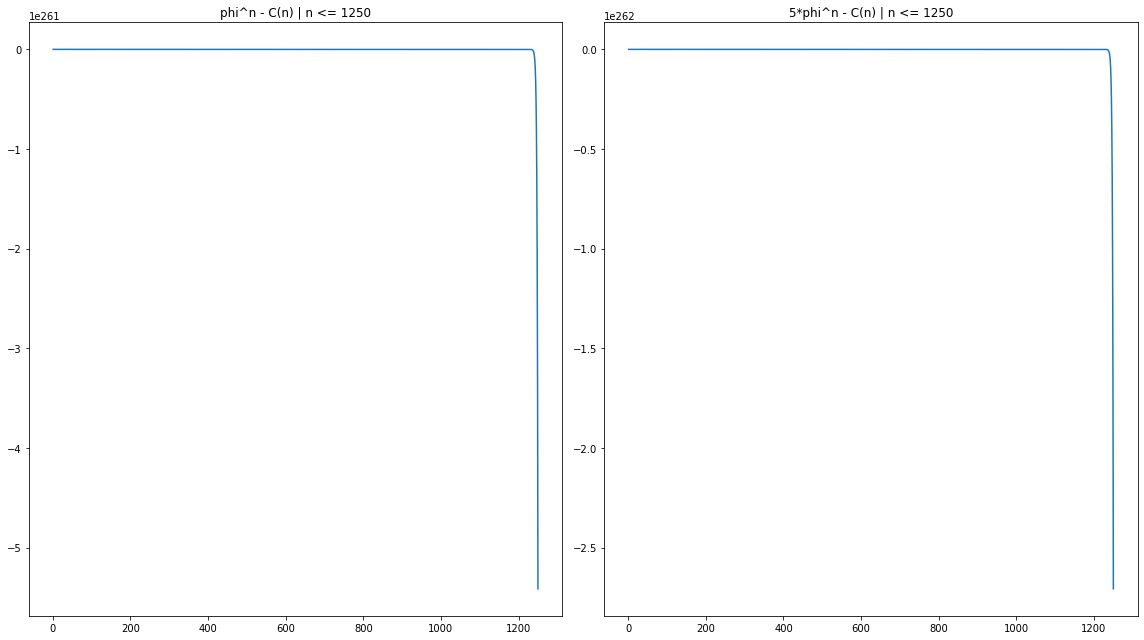

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def p(n):
    return 1/(4*n*np.sqrt(3))*np.exp(np.pi*np.sqrt(2*n/3))

def phi():
    return (1+np.sqrt(5))/2

def F(n):
    return 1/np.sqrt(5) * (np.power(phi(),n) - np.power(-1/phi(),n))

def C(n):
    C = p(n)
    for i in range(1,n):
        C += F(n-i)*p(i)
        
    return C

x = []
diff1 = []
diff5 = []

fig, axs = plt.subplots(1,2)
fig.set_size_inches(16,9)
axs[0].set_title("phi^n - C(n) | n <= 1250")
axs[1].set_title("5*phi^n - C(n) | n <= 1250")
for i in range(1,1251):
    x.append(i)
    unit_calc = np.power(phi(), i) - C(i)
    diff1.append(unit_calc)
    diff5.append(5*unit_calc)
axs[0].plot(x,diff1)
axs[1].plot(x,diff5)
plt.tight_layout()

For that reason, we create $Par(n)$ as follow, increasing the spacial complexity to $O(e^{\sqrt{n}})$ but reducing the temporal complexity to $O(e^{\sqrt{n}})$. <br>
Following this algorithm, we need to calculate every $Par(i), \space 1 \le i \le n$ to obtain $Par(n)$ but it is not restricting for the problem we are tackling as we must calculate every $Par(n)$.

In [4]:
Partitions = [] # container for every Par(n) possible

def Par(n):
    res = [[n]]
    if n > 0:
        for i in range(n-1,0,-1):
            suffixes = Partitions[n-i]
            for suff in suffixes:
                if suff[0] <= i:
                    res.append([i] + suff)
                    
    Partitions.append(res)

Then from $Par(n)$, we can calculate $K, \space K^{\prime}, \space K^{\prime \prime}$:

In [5]:
def Kanade_Russell(par_n):

    K = []

    for lam in par_n:
        if len(lam) == 1:                       # first, we verify the case (n) separetelly (it is always in K)
            K.append(lam)
        elif len(lam) == 2:                     # then the case (a,b) are treated separetelly too (only the second condition needs to be verified)
            if lam[0] - lam[1] <= 1:
                if (lam[0] + lam[1]) % 3 == 0:
                    K.append(lam)
            else:
                K.append(lam)
        else:                                   # then the general case for all partition with at least 3 literals
            i=0
            condition1 = True                   # forall i in [1, l(lambda)-2], lambda_i - lambda_{i+2} >= 3
            while condition1 and i < len(lam)-2:
                if lam[i] - lam[i+2] < 3:
                    condition1 = False
                i += 1
                    
            i=0
            condition2 = True                   # forall i in [1, l(lambda)-1], lambda_i - lambda_{i+1} <= 1 =>> lambda_i + lambda_{i+1} in 3Z
            while condition1 and i < len(lam)-1:
                if lam[i] - lam[i+1] <= 1:      # is lambda_i - lambda_{i+1} <= 1 ?
                    if (lam[i] + lam[i+1]) % 3 != 0: # then, is lambda_i + lambda_{i+1} not divisible by 3 ?
                        condition2 = False      # the two conditions are verified, thus lambda is not in K
                i += 1
            
            if condition2 and condition1:
                K.append(lam)

    K_p = [lam for lam in K if 1 not in lam]    # remove from K the entries containing 1 to create K'
    K_s = [lam for lam in K_p if 2 not in lam]  # remove from K' the entries containing 2 to create K''

    return K, K_p, K_s

We then define $T^{(q)}_{a,b,c,d}$ as follow. This calculation of works for all $T^{(q)}_X$ with $|X| \in \N^*$.

In [6]:
def T(par_n, accepted, q):
    if par_n == [[0]]:
        return par_n
    
    T = []
    for lam in par_n:
        adding = True # we suppose this lambda will be added to T
        i=0

        while i < len(lam) and adding: # iterate over the lambda_i
            if not (lam[i] % q in accepted): # if lambda_i mod q != a,b,c,d then this lambda is not added to T
                adding = False
            i += 1

        if adding:
            T.append(lam)
    
    return T

The following cells are here to calculate $Par$ up to different values of $n$ (up to $100$).

In [7]:
x = []
for n in range(25):
    x.append(n)
    Par(n)

In [8]:
for n in range(25, 50):
    x.append(n)
    Par(n)

In [9]:
for n in range(50, 60):
    x.append(n)
    Par(n)

In [ ]:
for n in range(60,70):
    x.append(n)
    Par(n)

In [ ]:
for n in range(70, 80):
    x.append(n)
    Par(n)

In [ ]:
for n in range(80, 90):
    x.append(n)
    Par(n)

In [ ]:
for n in range(90, 101):
    x.append(n)
    Par(n)

The following cell of code create graphs that shows that the Kanade-Roussell conjecture is verified for $n \le 100$.

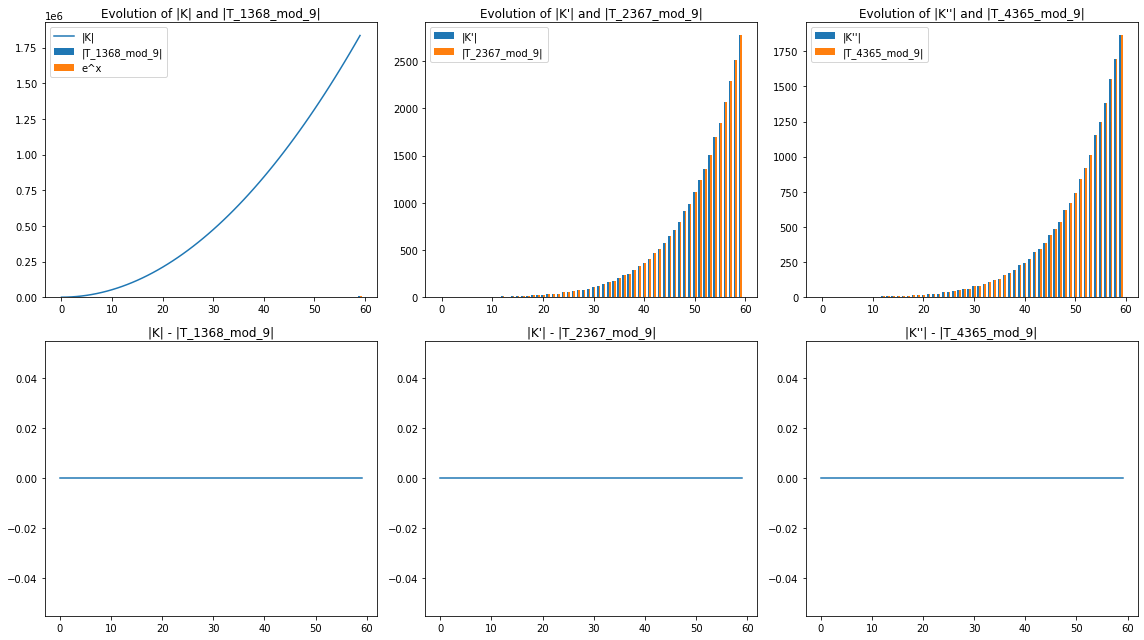

In [22]:
listK, listK_p, listK_s, listT1, listT2, listT4, distK, distK_p, distK_s = [],[],[],[],[],[],[],[],[]

for n in range(len(Partitions)):
    K, K_p, K_s = Kanade_Russell(Partitions[n]) # calculate K, K', K'' for each Par(n)
    T_1368_mod_9 = T(Partitions[n], [1,3,6,8], 9) # calculate T_{1,3,6,8}^{(9)} for each Par(n)
    T_2367_mod_9 = T(Partitions[n], [2,3,6,7], 9) # calculate T_{2,3,6,7}^{(9)} for each Par(n)
    T_4365_mod_9 = T(Partitions[n], [4,3,6,5], 9) # calculate T_{4,3,6,5}^{(9)} for each Par(n)

    listT1.append(len(T_1368_mod_9)) # add the cardinal of T_{1,3,6,8}^{(9)} to a list for plotting
    listT2.append(len(T_2367_mod_9)) # add the cardinal of T_{2,3,6,7}^{(9)} to a list for plotting
    listT4.append(len(T_4365_mod_9)) # add the cardinal of T_{4,3,6,5}^{(9)} to a list for plotting
    
    listK.append(len(K))        # add the cardinal of K to a list for plotting
    listK_p.append(len(K_p))    # add the cardinal of K' to a list for plotting
    listK_s.append(len(K_s))    # add the cardinal of K'' to a list for plotting

    distK.append(len(K) - len(T_1368_mod_9))        # add the difference in cardinals between K and T_{1,3,6,8}^{(9)} to a list for plotting
    distK_p.append(len(K_p) - len(T_2367_mod_9))    # add the difference in cardinals between K' and T_{2,3,6,7}^{(9)} to a list for plotting
    distK_s.append(len(K_s) - len(T_4365_mod_9))    # add the difference in cardinals between K'' and T_{4,3,6,5}^{(9)} to a list for plotting

X = np.array(x) # create a numpy array from a list of naturals for easier calculations for plotting

fig, axs = plt.subplots(2,3)
fig.set_size_inches(16,9)

axs[0,0].bar(X - 0.33/2, listK, 0.33)                       # bar graph for the cardinals of K
axs[0,0].bar(X + 0.33/2, listT1, 0.33)                      # bar graph for the cardinals of T_{1,3,6,8}^{(9)}
axs[0,0].legend(["|K|", "|T_1368_mod_9|"])
axs[0,0].set_title("Evolution of |K| and |T_1368_mod_9|")

axs[0,1].bar(X - 0.33/2, listK_p, 0.33)                     # bar graph for the cardinals of K'
axs[0,1].bar(X + 0.33/2, listT2, 0.33)                      # bar graph for the cardinals of T_{2,3,6,7}^{(9)}
axs[0,1].legend(["|K'|", "|T_2367_mod_9|"])
axs[0,1].set_title("Evolution of |K'| and |T_2367_mod_9|")

axs[0,2].bar(X - 0.33/2, listK_s, 0.33)                     # bar graph for the cardinals of K'' 
axs[0,2].bar(X + 0.33/2, listT4, 0.33)                      # bar graph for the cardinals of T_{4,3,6,5}^{(9)}
axs[0,2].legend(["|K''|", "|T_4365_mod_9|"])
axs[0,2].set_title("Evolution of |K''| and |T_4365_mod_9|")

axs[1,0].plot(X, distK)                                     # line graph of the the difference in cardinals between K and T_{1,3,6,8}^{(9)}
axs[1,0].set_title("|K| - |T_1368_mod_9|")

axs[1,1].plot(X, distK_p)                                   # line graph of the the difference in cardinals between K' and T_{2,3,6,7}^{(9)}
axs[1,1].set_title("|K'| - |T_2367_mod_9|")

axs[1,2].plot(X, distK_s)                                   # line graph of the the difference in cardinals between K'' and T_{4,3,6,5}^{(9)}
axs[1,2].set_title("|K''| - |T_4365_mod_9|")
plt.tight_layout()

# Newton Fractal

The Newton fractal is a boundary set in the complex plane which is characterized by Newton's method applied to a fixed polynomial $p(Z) ∈ ℂ[Z]$ or transcendental function. It is the Julia set of the meromorphic function $z ↦ z − \frac{p(z)}{p′(z)}$
 which is given by Newton's method. When there are no attractive cycles (of order greater than 1), it divides the complex plane into regions $Gk$, each of which is associated with a root $ζk$ of the polynomial, $k = 1, …, deg(p)$. In this way the Newton fractal is similar to the Mandelbrot set, and like other fractals it exhibits an intricate appearance arising from a simple description. It is relevant to numerical analysis because it shows that (outside the region of quadratic convergence) the Newton method can be very sensitive to its choice of start point.<br>
 ***- Wikipedia***

The code below show one implementation of the Newton method in Pyhon for the fixed polynomial $p(z) = z^3-1$.<br>
the image obtained is as follow :<br>
![test]()

In [ ]:
import PIL.Image
import numpy as np

maxIteration = 5000
tolerance = 0.1
width = 3500
height = 2000

def f(z): # z^3-1
    return np.power(z,3) - 1

def fp(z): # 3*z^2
    return 3*np.power(z,2)

roots = [ # roots of the equation f(z) = 0
    1,
    -.5+(1j*np.sqrt(3)/2),
    -.5-(1j*np.sqrt(3)/2),
]

image = PIL.Image.new("RGB", (width,height))

colors = [
    (255,0,0), # Red 
    (0,255,0), # Green
    (0,0,255)  # Blue
]

def calcColor(x, y, z):
    for _ in range(maxIteration):
            z -= f(z)/fp(z)
            for i in range(len(roots)):
                diff = z - roots[i]
                if(np.abs(diff) < tolerance):
                    return colors[i]
    return (0,0,0)
                


for x in range(width):
    for y in range(height):
        z = 3.5*x/width - 2 + 1j*(2*y/height -1)
        color = calcColor(x, y, z)
        image.putpixel((x,y), color)


image.save("Fractal.png", format="png")

Another modelisation can be obtained through the use of GLSL shader language <br>
```GLSL
// Author: Guennec Kilian
// Title: Visualisation of f(z) = z^3-1 via Newton fractal

#ifdef GL_ES
precision mediump float;
#endif

// complex operators
#define cproduct(a, b) vec2(a.x*b.x-a.y*b.y, a.x*b.y+a.y*b.x)
#define cdivide(a, b) vec2(((a.x*b.x+a.y*b.y)/(b.x*b.x+b.y*b.y)),((a.y*b.x-a.x*b.y)/(b.x*b.x+b.y*b.y)))

// constantes (modifiable to change the rendering)
#define tolerance 0.99
#define maxIter 5000
#define invertSpeed 15.

uniform vec2 u_resolution;
uniform float u_time;

vec2 f(vec2 z){ // z^3-1
    return cproduct(z, cproduct(z,z)) - vec2(1,0);
}

vec2 fp(vec2 z){ // 3*z^2
    return 3.*cproduct(z,z);
}


void main() {
    
    vec2 z = gl_FragCoord.xy/u_resolution.xy; // get one pixel coordinate of the image
	
    // modify space from [0,1] X [0,1] to [-2.5, 1] X [-1, 1]
    z.x = 3.5*z.x - 2.5;
    z.y = 2.*z.y - 1.;
    
    // time function for the animation
    float fracu = fract(u_time/invertSpeed)*4.-2.;
    float c = fracu*sign(fracu)-1.;
    
    // colors vectors
    vec3 red = vec3(1.,0.,0.);
    vec3 green = vec3(0.,1.,0.);
    vec3 blue = vec3(0.,0.,1.);
    
    // roots of the equation f(z) = 0
    vec2 root1 = vec2(1.,0.);
    vec2 root2 = vec2(-0.5,-sqrt(3.)/2.);
    vec2 root3 = vec2(-0.5,sqrt(3.)/2.);
    
    for(int i=0;i<maxIter;i++){
    
        // calculate z_n+1 from z_n
        //comment/uncomment the expression of z_n+1 you want to try
        //
        //still image
        z -= cdivide(f(z),fp(z));
        //
        // movement along the reals
    	//z -= vec2(c,0.)+cdivide(f(z),fp(z));
        //
        // movement along the imaginaries
    	//z -= vec2(0., c)+cdivide(f(z),fp(z));
        //
        // variant of c for the next movement
        //vec2 c = 0.5*vec2(cos(u_time/2.), sin(u_time/2.));
        // movement along the reals and the imaginaries
    	//z -= c+cdivide(f(z),fp(z));
        
        // difference between z_n+1 and the roots
        vec2 diff1 = z-root1;
        vec2 diff2 = z-root2;
        vec2 diff3 = z-root3;
        
        // for each color, (red, green, blue) test if |R(diffx)| < tolerance && |I(diffx)| < tolerance. Black is the default color for the abscence of informations
    	vec3 color = ((1.-step(tolerance, abs(diff1.x))) * (1.-step(tolerance, abs(diff1.y)))) * red + ( ((1.-step(tolerance, abs(diff2.x))) * (1.-step(tolerance, abs(diff2.y)))) * green + (((1.-step(tolerance, abs(diff3.x)))*(1.-step(tolerance, abs(diff3.y)))) * blue) );
        
        gl_FragColor = vec4(color,1.0);
    }
    
}
```